In [9]:
import pandas as pd
df=pd.read_csv("Dataset.csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [31]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
df.shape

(9551, 21)

### Level 1

***TASK 1 Top cuisines***

In [32]:
#1. Determine the top three most common cuisines in the dataset.
no_of_cuisines=df['Cuisines'].str.split(', ').explode().value_counts()
top_three_cuisines=no_of_cuisines.head(3).index.to_list()
print("Top three most common cuisines in the dataset :  ")
for i in range(len(top_three_cuisines)):
    print(f"{i+1}. {top_three_cuisines[i]}")


Top three most common cuisines in the dataset :  
1. North Indian
2. Chinese
3. Fast Food


In [33]:
#2. Calculate the percentage of restaurants that serve each of the top cuisines.
total_no_of_restaurants = len(df)
cuisine_percentages = (no_of_cuisines.head(3) / total_no_of_restaurants) * 100
print("Percentage of restaurants that serve each of the top cuisines : \n", cuisine_percentages)

Percentage of restaurants that serve each of the top cuisines : 
 Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


***Task 2 City Analysis***

In [3]:
#1.  Identify the city with the highest number of restaurants in the dataset.
no_of_cities=df['City'].value_counts()
top_city=no_of_cities.idxmax()
print("The city with the highest number of restaurants in the dataset : ", top_city)

The city with the highest number of restaurants in the dataset :  New Delhi


In [47]:
#2. Calculate the average rating for restaurants in each city
average_rating = df.groupby("City")['Aggregate rating'].mean()
print("The average rating for restaurants in each city : \n", average_rating)

The average rating for restaurants in each city : 
 City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [46]:
#3. Determine the city with the highest average rating.
highest_average_rating=average_rating.idxmax()
print(f"The city with the highest average rating : {highest_average_rating}")

The city with the highest average rating : Inner City


***Task 3 : Price Range distribution***

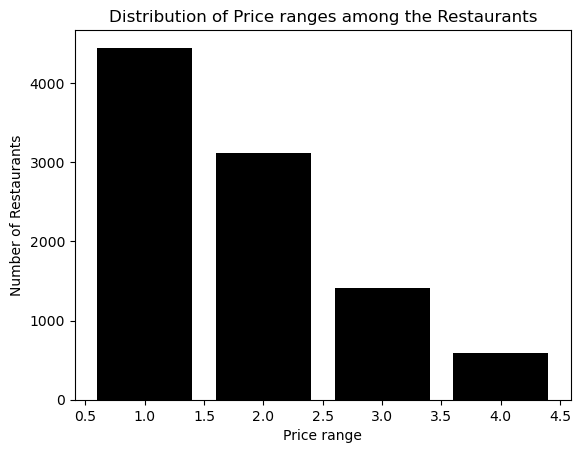

In [7]:
#1. Create a histogram or bar chart to visualise the distribution of price ranges among the restaurants.
import matplotlib.pyplot as plt
price_range=df['Price range'].value_counts()
plt.bar(price_range.index, price_range.values, color = "black")
plt.xlabel("Price range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Price ranges among the Restaurants")
plt.show()

In [66]:
#2. Calculate the percentage of restaurants in each price range category.
percentages=(price_range/len(df))*100
print("Percentage of Restaurants in each price range category : \n")
for pr, percent in percentages.items():
    print(f"{pr} : {percent:.2f} %")

Percentage of Restaurants in each price range category : 

1 : 46.53 %
2 : 32.59 %
3 : 14.74 %
4 : 6.14 %


***Task 4: Online Delivery***

In [67]:
#1. Determine the percentage of restaurants that offer online delivery.
online_delivery=df['Has Online delivery'] == 'Yes'
online_percent=online_delivery.mean()*100
print(f"Percentage of restaurants that offer online delivery : {online_percent:.2f} %")

Percentage of restaurants that offer online delivery : 25.66 %


In [12]:
#2. Compare the average ratings of restaurants with and without online delivery.
avg_rating_online=df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("Average ratings of restaurants with and without online delivery : ")
for i, j in avg_rating_online.items():
    print(f"{i} : {j:.2f} ")

Average ratings of restaurants with and without online delivery : 
No : 2.47 
Yes : 3.25 


### Level 3

***Task 1: Restaurant Reviews***

In [75]:
#1. Analyze the text reviews to identify the most common positive and negative keywords.
from sklearn.feature_extraction.text import CountVectorizer
reviews = df['Rating text'].dropna()
vectorizer = CountVectorizer(stop_words='english')
word_count = vectorizer.fit_transform(reviews)
sum_words = word_count.sum(axis=0)
word_frequency = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_frequency = sorted(word_frequency, key=lambda x: x[1], reverse=True)
print("Most common words in reviews:")
print(word_frequency[:10])

Most common words in reviews:
[('average', 3737), ('good', 3179), ('rated', 2148), ('excellent', 301), ('poor', 186)]


In [82]:
#2. Calculate the average length of reviews and explore if there is a relationship between review length and rating
df['Review Length'] = df['Rating text'].dropna().str.len()
avg_length = df['Review Length'].mean()
correlation = df[['Review Length', 'Aggregate rating']].corr().iloc[0, 1]
print(f"Average review length: {avg_length:.3f}")
print(f"Correlation between length of reviews and rating: {correlation:.4f}")

Average review length: 7.021
Correlation between length of reviews and rating: -0.4789


***Task 2 :  Votes Analysis***

In [5]:
#1. Identify the restaurants with the highest and lowest number of votes
highest_no_of_votes= df.loc[df['Votes'].idxmax()]
lowest_no_of_votes=df.loc[df['Votes'].idxmin()]
print(f"Restaurant with the highest votes : {highest_no_of_votes['Restaurant Name']}")
print(f"Restaurant with the lowest votes : {lowest_no_of_votes['Restaurant Name']}")


Restaurant with the highest votes : Toit
Restaurant with the lowest votes : Cantinho da Gula


In [7]:
#2 Analyze if there is a correlation between the number of votes and the rating of a restaurant.
correlation_votes= df[['Votes', 'Aggregate rating']].corr().iloc[0, 1]
print(f"Correlation between the number of votes and the rating: {correlation_votes:.2f}")

Correlation between the number of votes and the rating: 0.31


***Task 3 : Price Range vs. Online Delivery and  Table Bookig***n

In [24]:
#1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
from scipy.stats import chi2_contingency

df['Has Table booking'] = df['Has Table booking'].str.strip().str.capitalize()
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.capitalize()

tb_ct = pd.crosstab(df['Price range'], df['Has Table booking'])
od_ct = pd.crosstab(df['Price range'], df['Has Online delivery'])
chi2_tb, p_tb, _, _ = chi2_contingency(tb_ct)
chi2_od, p_od, _, _ = chi2_contingency(od_ct)
if p_tb < 0.05:
    print("There is a significant relationship between price range and the Table Booking.")
else:
    print("There is no significant relationship between price range and the Table Booking.")
if p_od < 0.05:
    print("There is a significant relationship between price range and the Online Delivery.")
else:
    print("There is no significant relationship between price range and the Online Delivery.")

There is a significant relationship between price range and the Table Booking.
There is a significant relationship between price range and the Online Delivery.


In [25]:
#2. Determine if higher-priced restaurants are more likely to offer these services
from scipy.stats import spearmanr

sp_tb, _ = spearmanr(df['Price range'], df['Has Table booking'].eq('Yes'))
sp_od, _ = spearmanr(df['Price range'], df['Has Online delivery'].eq('Yes'))
print(f"\nSpearman Correlation for Table Booking: {sp_tb:.4f}")
print(f"Spearman Correlation for Online Delivery: {sp_od:.4f}")
print("\nInsights : ")
if sp_tb > 0:
    print("Higher-priced restaurants are more likely to offer the Table Booking.")
elif sp_tb < 0:
    print("Lower-priced restaurants are more likely to offer the Table Booking.")
else:
    print("Service availability does not depend on the price range.")
if sp_od > 0:
    print("Higher-priced restaurants are more likely to offer the Online Delivery.")
elif sp_od < 0:
    print("Lower-priced restaurants are more likely to offer the Online Delivery.")
else:
    print("Service availability does not depend on the price range.")


Spearman Correlation for Table Booking: 0.4718
Spearman Correlation for Online Delivery: 0.1364

Insights : 
Higher-priced restaurants are more likely to offer the Table Booking.
Higher-priced restaurants are more likely to offer the Online Delivery.
